<a href="https://colab.research.google.com/github/vivek12345/kmeans-clustering-learning/blob/main/kmeans_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv("Mall_Customers.csv")

print(df.shape)

(200, 5)


In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Unlabelled Mall Customer Data')

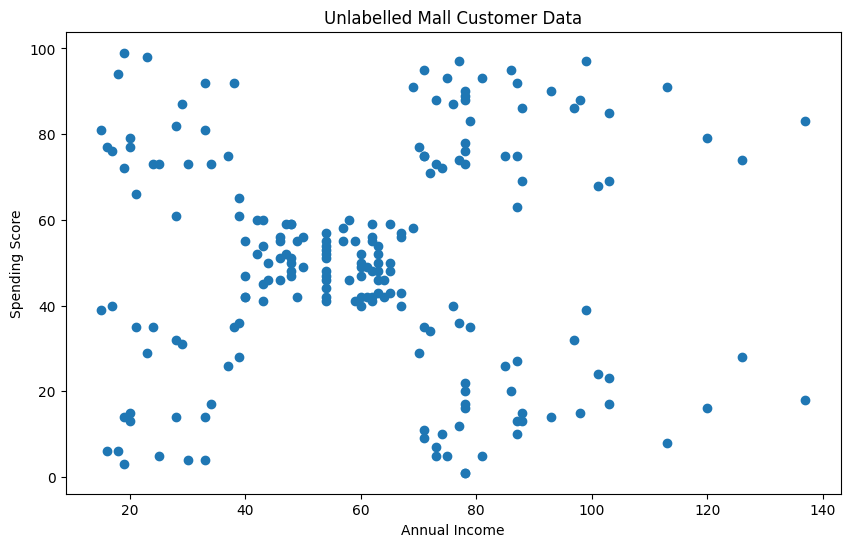

In [9]:
plt.figure(figsize=(10 ,6))
plt.scatter(df["Annual Income (k$)"], df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title("Unlabelled Mall Customer Data")

In [11]:
X = df.iloc[:, [3, 4]].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

Elbow Method


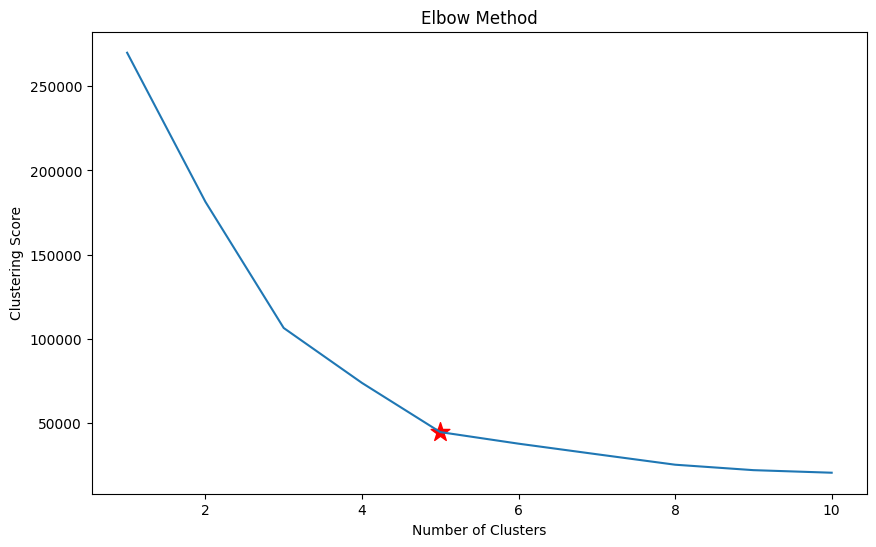

In [15]:
from sklearn.cluster import KMeans

clustering_score = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init="random", random_state=42)
  kmeans.fit(X)
  clustering_score.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5, clustering_score[4], s=200, c='red', marker="*")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Clustering Score")
plt.show()

Compute K-Means Clustering

In [16]:
kmeans = KMeans(n_clusters=5, init="random", random_state=42)
kmeans.fit(X)

pred = kmeans.predict(X)
pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [20]:
df["Cluster"] = pd.DataFrame(pred, columns=["cluster"])
print("No of data points in each cluster \n", df['Cluster'].value_counts())
df

No of data points in each cluster 
 Cluster
4    81
3    39
2    35
0    23
1    22
Name: count, dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


In [21]:
pred.shape

(200,)

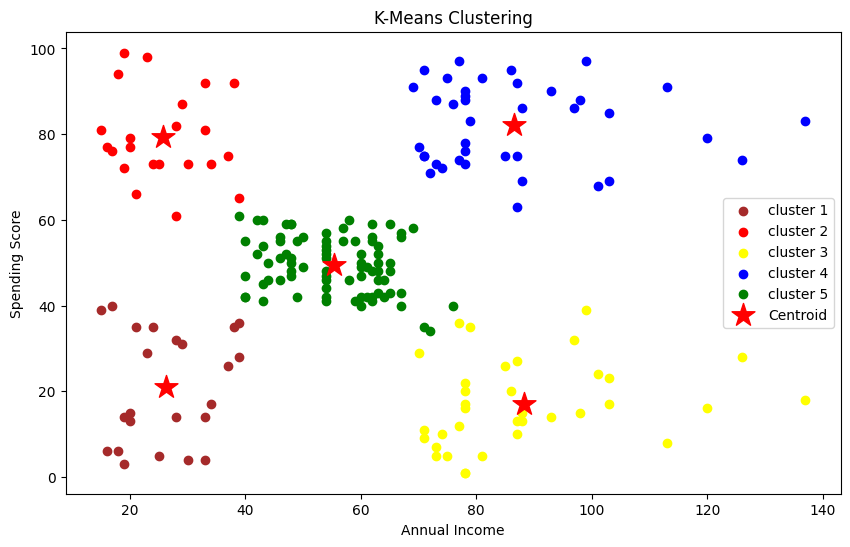

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(X[pred==0,0], X[pred==0, 1], c="brown", label="cluster 1")
plt.scatter(X[pred==1,0], X[pred==1, 1], c="red", label="cluster 2")
plt.scatter(X[pred==2,0], X[pred==2, 1], c="yellow", label="cluster 3")
plt.scatter(X[pred==3,0], X[pred==3, 1], c="blue", label="cluster 4")
plt.scatter(X[pred==4,0], X[pred==4, 1], c="green", label="cluster 5")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("K-Means Clustering")

plt.legend()
